In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 1. Load dataset
df = pd.read_csv('digit_data.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 2. Convert the data given in the dataFrame into a NumPy array
data = np.array(df)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
# 3. Query the shape of the array
data_shape = data.shape
data_count = data_shape[0]
features = data_shape[1]

data_count, features

(42000, 785)

In [5]:
# 4. Shuffle the contents of the array 
np.random.shuffle(data)

In [6]:
# 5. Use first 1000 images of the dataset as the test set and remaining as the train set
test = data[:1000]
train = data[1000:]

In [7]:
# For test set -- Transpose the data (Take rows as the labels of the test set and rows as the features)
test = test.T
X_test = test[1:, :]
y_test = test[0,:]
X_test = X_test / 255 # Color normalization


test.shape, X_test.shape, y_test.shape 

((785, 1000), (784, 1000), (1000,))

In [8]:
# For train set -- Transpose the data (Take rows as the labels and rows as the features)
train = train.T
X_train = train[1:, :]
y_train = train[0]

X_train = X_train / 255

train.shape, X_train.shape, y_train.shape 

((785, 41000), (784, 41000), (41000,))

In [9]:
# Generate a random index in the range dedicated for training images
index = np.random.randint(0, len(train),1)
index

array([662])

In [10]:
train.shape

(785, 41000)

In [11]:
train[index].shape

(1, 41000)

In [12]:
train_ = train.T
new_img = train_[index, :-1]
new_img.shape

new_image = new_img.reshape(28,-1)
new_image.shape

(28, 28)

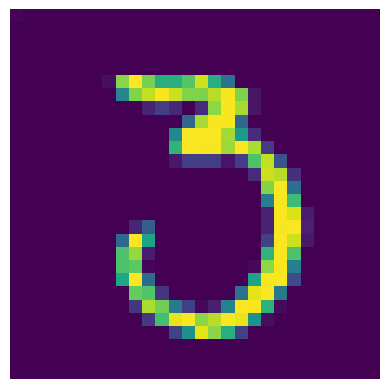

In [13]:
# X_test_2d = new_img.reshape(28,-1)
# X_test_2d.shape
plt.imshow(new_image) 
plt.axis('off')
plt.show()

In [39]:
def initial_params():    
    W1 = np.random.uniform(low=-0.5, high=0.5, size=(256,784))
    W2 = np.random.uniform(low=-0.5, high=0.5, size=(10,256))
    b1 = np.random.uniform(low=-0.5, high=0.5, size=(256,1))
    b2 = np.random.uniform(low=-0.5, high=0.5, size=(10,1))

    # print(W1.shape, W2.shape, b1.shape, b2.shape)
    return W1, b1, W2, b2

_, _, W2, _ = initial_params()
W2[:100]
W2.shape

(10, 128)

In [40]:
def ReLU_fn(vector):
    return np.maximum(0, vector)

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
relu = ReLU_fn(vector)
vector, relu

(array([[-0.38138337],
        [-0.19064236],
        [ 0.24676612],
        [-0.01925385],
        [-0.26771501],
        [-0.20654131],
        [ 0.47157199],
        [-0.3657398 ],
        [-0.33856101],
        [-0.06147007]]),
 array([[0.        ],
        [0.        ],
        [0.24676612],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.47157199],
        [0.        ],
        [0.        ],
        [0.        ]]))

In [17]:
def d_ReLU(vector):
    return np.where(vector > 0, 1.0, 0.0)


vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
relu = d_ReLU(vector)
relu

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [18]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000])
vector

array([-0.40976664,  0.45059273,  0.4484673 ,  0.41039931, -0.26772568,
        0.04395693, -0.32324541, -0.19305053, -0.4206301 ,  0.04769347,
        0.        ])

(-0.5, 0.5)

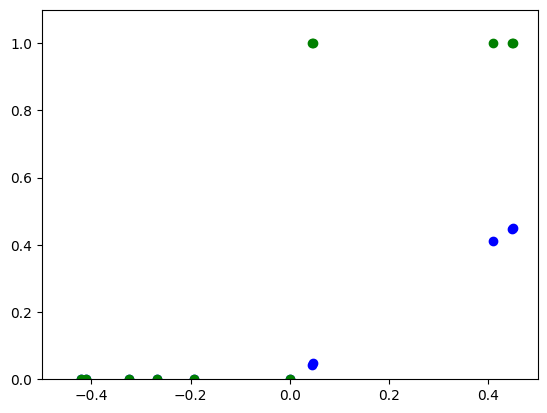

In [19]:
relu = ReLU_fn(vector)
d_relu = d_ReLU(vector)

plt.scatter(vector, relu, c='blue')
plt.scatter(vector, d_relu, c='green')
plt.ylim(0.0, 1.1)
plt.xlim(-0.5, 0.5)

In [20]:
def softmax_fn(vector):
    exp_vector = np.exp(vector - np.max(vector))
    return exp_vector / exp_vector.sum()

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
softmax = softmax_fn(vector)
vector, softmax

(array([[ 0.41292184],
        [-0.37981686],
        [ 0.14416087],
        [ 0.16048276],
        [ 0.13302853],
        [-0.00996004],
        [ 0.39551762],
        [ 0.2308902 ],
        [-0.27521007],
        [ 0.07342423]]),
 array([[0.13448422],
        [0.06086804],
        [0.10278978],
        [0.10448127],
        [0.10165183],
        [0.08810815],
        [0.13216388],
        [0.11210268],
        [0.06758019],
        [0.09576998]]))

In [115]:
# def df_softmax(vector):
#     d_softmax = softmax_fn(vector) * (1 - softmax_fn(vector))

#     return d_softmax

# vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
# d_softmax = softmax_fn(vector)
# vector, d_softmax

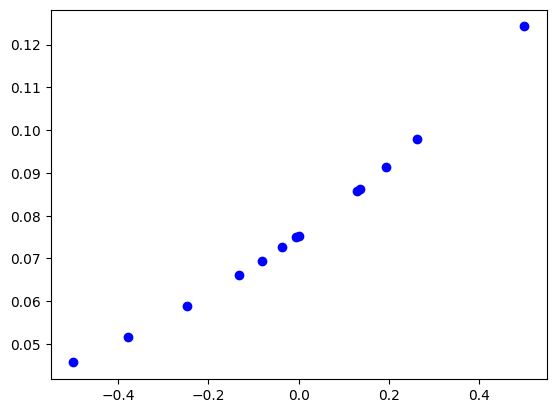

In [21]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000, -0.5, 0.5])
vector

softmax = softmax_fn(vector)
# d_softmax = df_softmax(vector)

plt.scatter(vector, softmax, c='blue')
# plt.scatter(vector, d_softmax, c='green')


In [22]:
def forward_prop(W1, b1, W2, b2, A0):
    Z1 = np.dot(W1, A0) + b1
    A1 = ReLU_fn(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = softmax_fn(Z2)

    return Z1, A1, Z2, A2

In [23]:
# One hot encoding
def one_hot_encoding(Y, num_classes):
    num_classes = int(num_classes)  # Ensure num_classes is an integer
    encoded_mat = np.zeros((num_classes, len(Y)))
    for i in range(len(Y)):
        class_index = int(Y[i])
        encoded_mat[class_index, i] = 1
    return encoded_mat

y_train = one_hot_encoding(y_train, num_classes=10)
y_train.shape
y_test = one_hot_encoding(y_test, num_classes=10)
y_test.shape


(10, 1000)

In [24]:
# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, y, A0, y_train):
    m = A0.shape[1]
    dZ2 = A2 - y_train
    dZ1 = np.dot(W2.T, dZ2) * d_ReLU(Z1)

    dW1 = (1 / m) * np.dot(dZ1, A0.T)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

In [25]:
# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate= 0.01):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, b1, W2, b2

In [26]:
def obtain_predictions(vector):  # Corrected parameter name
    return np.argmax(vector, axis=0)


In [27]:
%pip install scikit-learn
from sklearn.metrics import accuracy_score

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
def accuracy_sc(y_pred, y_actual): # Vectors  
    num_samples = y_actual.shape[1]

    if y_pred.ndim ==2:
        pred_label = obtain_predictions(y_pred)
    else:
        pred_label = y_pred
        
    if y_actual.ndim == 2:
        actual_label = obtain_predictions(y_actual)
    else:
        actual_label = y_actual
    
    num_correct = np.sum(pred_label == actual_label)
    # print(num_correct)
    return num_correct / num_samples

In [29]:
y_train.shape

(10, 41000)

In [30]:
def gradient_descent(X_train, y_train, learning_rate, num_iterations):
    W1, b1, W2, b2 = initial_params()

    accuracy_list = []

    for i in range(num_iterations+1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, y_train, X_train, y_train)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i%5==0:
            accuracy = accuracy_sc(A2,y_train)
            accuracy_list.append((i,accuracy))
            print(f"Iteration: {i} \t Accuracy: {accuracy:.5f}")

    return W1, b1, W2, b2, accuracy_list

In [31]:
def make_prediction(X_test, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X_test) 
    pred = obtain_predictions(A2)
    return pred    

In [32]:
def plot_image(image):
    X_test_2d = image.reshape(28,-1)
    print(X_test_2d.shape)
    plt.imshow(X_test_2d) 
    plt.axis('off')
    plt.show()

In [41]:
W1, b1, W2, b2, accuracy_list = gradient_descent(X_train, y_train, learning_rate=0.001, num_iterations=1000)

Iteration: 0 	 Accuracy: 0.13198
Iteration: 5 	 Accuracy: 0.13205
Iteration: 10 	 Accuracy: 0.13220
Iteration: 15 	 Accuracy: 0.13234
Iteration: 20 	 Accuracy: 0.13241
Iteration: 25 	 Accuracy: 0.13246
Iteration: 30 	 Accuracy: 0.13266
Iteration: 35 	 Accuracy: 0.13280
Iteration: 40 	 Accuracy: 0.13293
Iteration: 45 	 Accuracy: 0.13305
Iteration: 50 	 Accuracy: 0.13324
Iteration: 55 	 Accuracy: 0.13351
Iteration: 60 	 Accuracy: 0.13354
Iteration: 65 	 Accuracy: 0.13373
Iteration: 70 	 Accuracy: 0.13385
Iteration: 75 	 Accuracy: 0.13393
Iteration: 80 	 Accuracy: 0.13400
Iteration: 85 	 Accuracy: 0.13398
Iteration: 90 	 Accuracy: 0.13410
Iteration: 95 	 Accuracy: 0.13424
Iteration: 100 	 Accuracy: 0.13437
Iteration: 105 	 Accuracy: 0.13446
Iteration: 110 	 Accuracy: 0.13463
Iteration: 115 	 Accuracy: 0.13476
Iteration: 120 	 Accuracy: 0.13498
Iteration: 125 	 Accuracy: 0.13502
Iteration: 130 	 Accuracy: 0.13510
Iteration: 135 	 Accuracy: 0.13517
Iteration: 140 	 Accuracy: 0.13520
Iterati

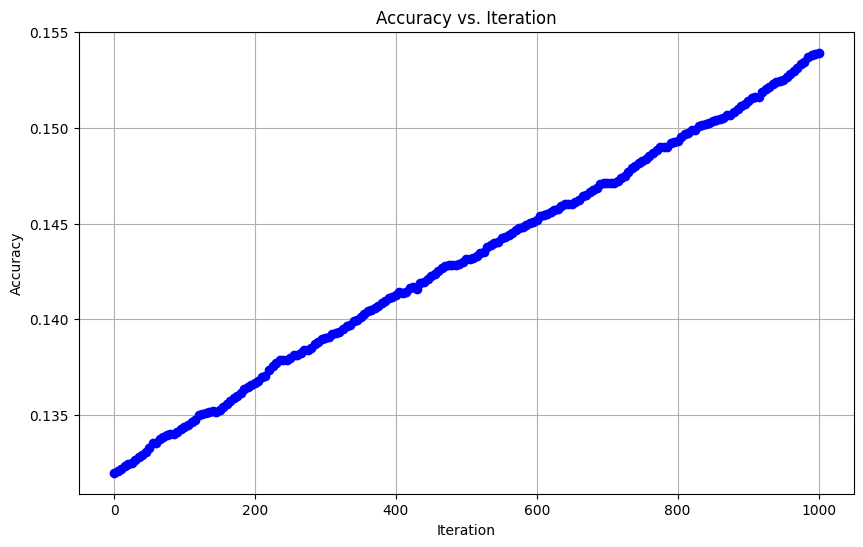

In [42]:
iterations, accuracies = zip(*accuracy_list)

plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [43]:
def test_predictions(W1, b1, W2, b2, X_test, y_test):
    test = make_prediction(X_test, W1, b1, W2, b2)
    image = X_test.T
    print(test.shape)
    accuracy = accuracy_sc(test, y_test)
    print(f"Accuracy:{accuracy}")
    y_test_label = obtain_predictions(y_test)
    for i in range(10):
        print(test[i], y_test_label[i])
        print(image[i].shape)
        plot_image(image[i])

(1000,)
Accuracy:0.136
2 2
(784,)
(28, 28)


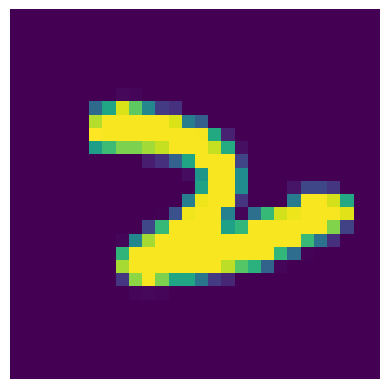

0 5
(784,)
(28, 28)


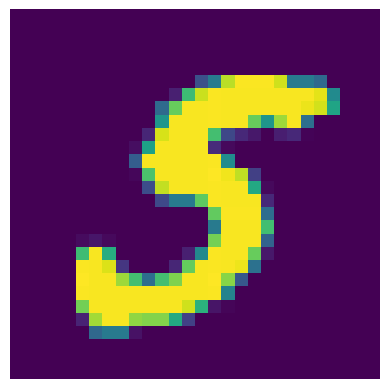

8 0
(784,)
(28, 28)


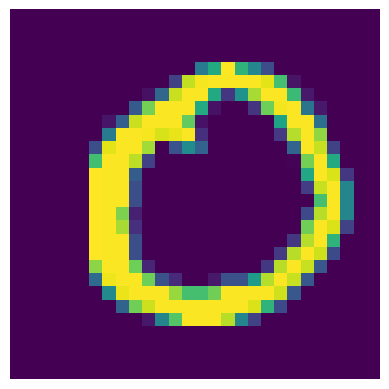

0 2
(784,)
(28, 28)


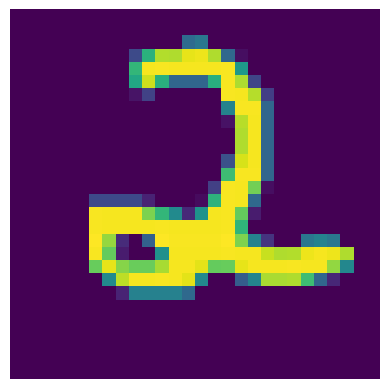

0 5
(784,)
(28, 28)


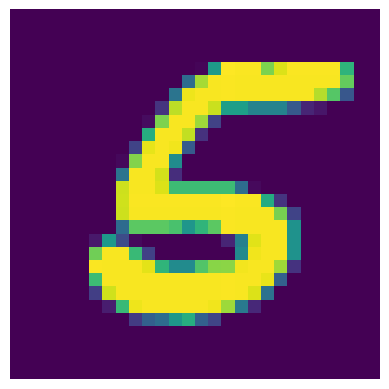

8 1
(784,)
(28, 28)


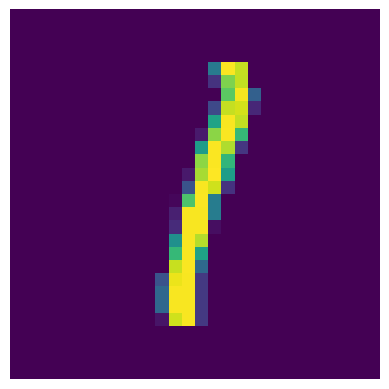

2 4
(784,)
(28, 28)


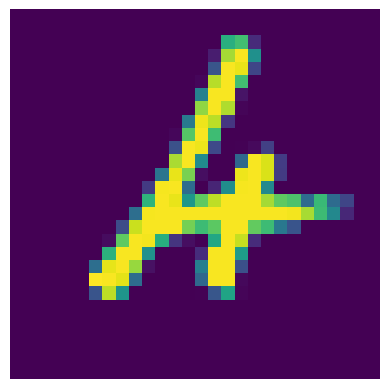

8 7
(784,)
(28, 28)


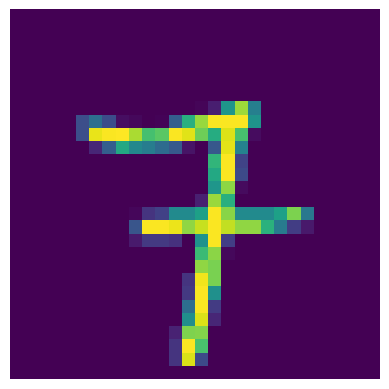

2 4
(784,)
(28, 28)


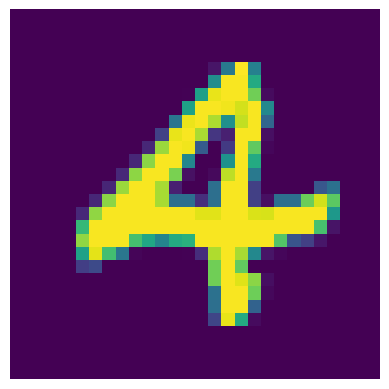

0 4
(784,)
(28, 28)


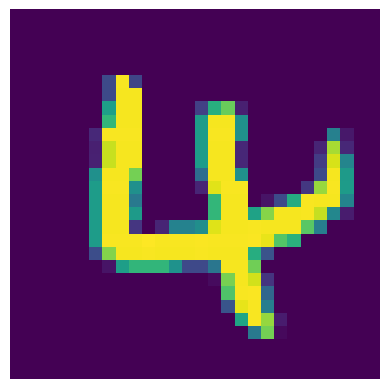

In [44]:
test_predictions(W1, b1, W2, b2, X_test, y_test)